<a href="https://colab.research.google.com/github/VoTanThinh/PROJECT-AI/blob/main/CUOIKI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization 
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.models import load_model
import matplotlib.pyplot as plt  
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np     

In [ ]:
#lấy dữ liệu và mô tả dữ liệu 
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)
training_set=train_data.flow_from_directory('/content/drive/MyDrive/AI/DATAFINAL/TRAIN',target_size=(300,300), batch_size=32, class_mode='categorical')
test_set=test_data.flow_from_directory('/content/drive/MyDrive/AI/DATAFINAL/VALIDATION',target_size=(300,300 ), batch_size=32, class_mode='categorical')
training_set.class_indices
test_set.class_indices
     

Found 1249 images belonging to 5 classes.
Found 784 images belonging to 5 classes.


{'HOACUC': 0, 'HOAHONG': 1, 'HOAHUONGDUONG': 2, 'HOALY': 3, 'HOAMAI': 4}

In [ ]:
#xây dựng mô hình CNN sủ dụng tuần tự
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(300,300,3),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))




#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(512,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(5,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [ ]:
# Huấn luyện mô hình và biên dịch
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs=20, batch_size=64 ,verbose=1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc) 
print('hàm mất mát trên tập kiểm ta', test_loss) 

Epoch 1/20
40/40 [==============================] - 257s 6s/step - loss: 1.5874 - accuracy: 0.5813
Epoch 2/20
40/40 [==============================] - 46s 1s/step - loss: 0.7470 - accuracy: 0.6894
Epoch 3/20
40/40 [==============================] - 46s 1s/step - loss: 0.6179 - accuracy: 0.7558
Epoch 4/20
40/40 [==============================] - 46s 1s/step - loss: 0.5650 - accuracy: 0.7750
Epoch 5/20
40/40 [==============================] - 46s 1s/step - loss: 0.4783 - accuracy: 0.8151
Epoch 6/20
40/40 [==============================] - 47s 1s/step - loss: 0.4995 - accuracy: 0.8207
Epoch 7/20
40/40 [==============================] - 45s 1s/step - loss: 0.4571 - accuracy: 0.8375
Epoch 8/20
40/40 [==============================] - 46s 1s/step - loss: 0.4295 - accuracy: 0.8383
Epoch 9/20
40/40 [==============================] - 46s 1s/step - loss: 0.3182 - accuracy: 0.8759
Epoch 10/20
40/40 [==============================] - 46s 1s/step - loss: 0.2993 - accuracy: 0.8903
Epoch 11/20
40/40 

In [ ]:
%cd /content/drive/MyDrive/AI/DATAFINAL

/content/drive/MyDrive/AI/DATAFINAL


In [ ]:
#Lưu
from keras.models import load_model
model.save("CUOIKY.h5")
model_1=load_model('CUOIKY.h5')

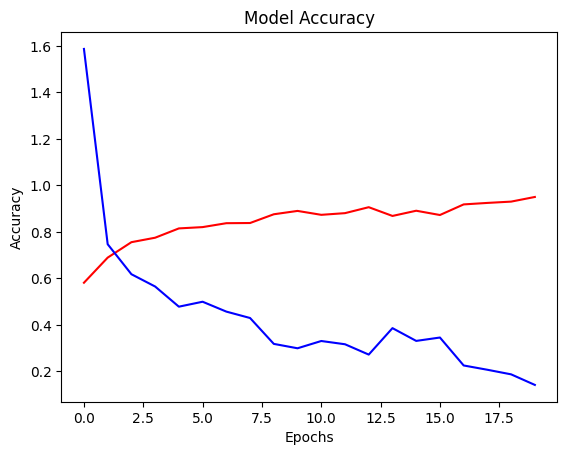

In [ ]:
# VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Training accuracy')
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

1/1 [==============================] - 0s 91ms/step
HOACUC


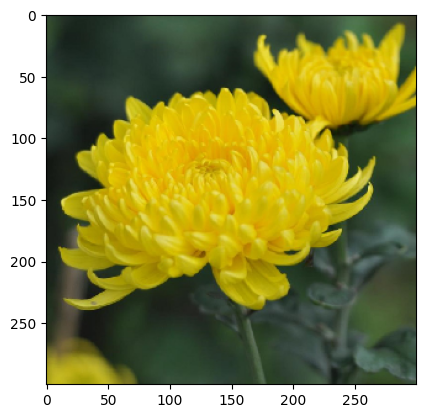

1/1 [==============================] - 0s 33ms/step
HOAMAI


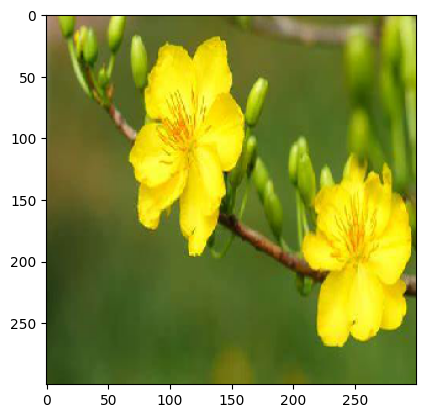

1/1 [==============================] - 0s 22ms/step
HOAHONG


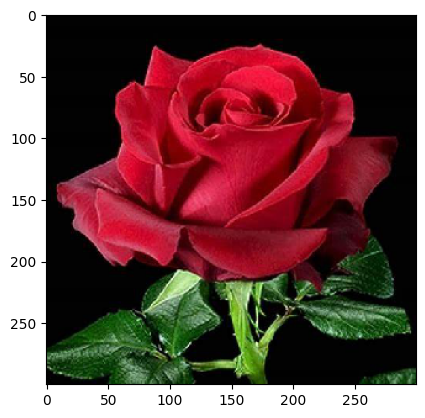

1/1 [==============================] - 0s 21ms/step
HOAHUONGDUONG


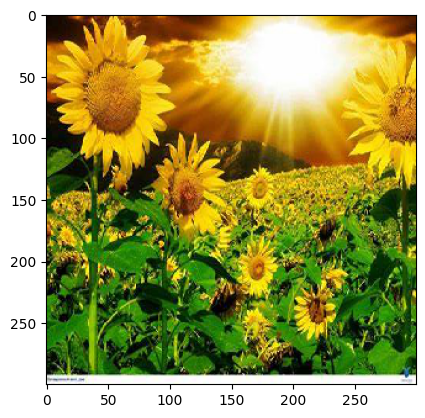

1/1 [==============================] - 0s 21ms/step
HOALY


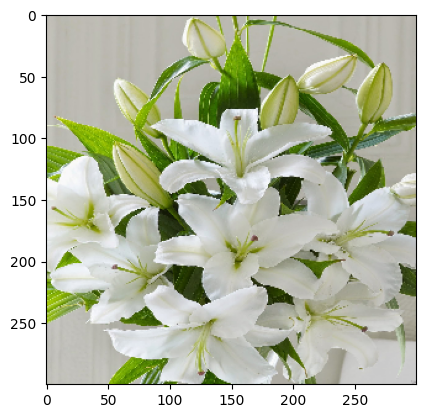

In [ ]:
#kiểm tra lại kết quả sau khi học
test='/content/drive/MyDrive/AI/DATAFINAL/TEST'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['HOACUC','HOAHONG','HOAHUONGDUONG','HOALY', 'HOAMAI']
  print(class_name[result]) 
  plt.show()